In [1]:
%matplotlib inline
import numpy as np
import scipy.ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import pandas as pd
import dask
import os.path
from __future__ import division
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)


from useful import *

global data_dir
data_dir = '/scratch/ap587/dry_data/'


In [2]:
def testfun(exp, lag_cor=0, do_psi=0, do_log=0):
    runs = range(13,25)
    runset = open_runset(data_dir, exp,runs)    
    runset.drop(['ps','vor','div']) 
    runset['p_trop'] = 1000*np.exp(-9.81/(287.04*270)*runset.h_trop*1000)
    c = runset.mean('lon')
    
    vmaxt = 300
    vmint = 200
    vmaxu = 25
    vmaxv = 1.2
    vmaxsf = 0.5e11
    
    print(c)
    
    if do_psi:
        c.load()
        data = {'omega':c.omega.data, 'vcomp':c.vcomp.data, 'time':c.time.data, 'pfull':c.pfull.data, 'lat':c.lat.data}
        psi = cal_stream_fn(data)
        c['psi'] = (('time','pfull','lat'),psi)
        
        
    plot_grid(c, 'Annual Mean for exp' + exp, do_log=do_log)        
    plot_timeseries(c)     
    # seaonal lag correction for locating peaks (days) [~35 days for 10m depth]
    #seasonal plots
    lag_cor = calc_seasonal_lag(c.teq)
    print(lag_cor)
    print(c.time.isel(time=lag_cor))
    
    #plot_timeseries(c)
    
    n_eq = (np.append(np.arange(0,45), np.arange(315,360)) + lag_cor)%360
    n_sum = (np.arange(45,135) + lag_cor)%360
    s_eq = (np.arange(135,225) + lag_cor)%360
    n_win = (np.arange(225,315) + lag_cor)%360
    sum_sel = np.append(n_sum, np.append(n_sum+360, n_sum+360*2))
    win_sel = np.append(n_win, np.append(n_win+360, n_win+360*2))
    eq_sel = np.append(n_eq, np.append(n_eq+360, n_eq+360*2))
    eq_sel2 = np.append(s_eq, np.append(s_eq+360, s_eq+360*2))
    plot_grid(c.isel(time=sum_sel),  'NH summer mean for exp' + exp, do_log=do_log, vmaxt=vmaxt, vmint=vmint,vmaxu=vmaxu,vmaxsf=vmaxsf)
    plot_grid(c.isel(time=win_sel), 'NH winter mean for exp' + exp,do_log=do_log, vmaxt=vmaxt, vmint=vmint,vmaxu=vmaxu,vmaxsf=vmaxsf)
    plot_grid(c.isel(time=eq_sel), 'Northward equinox mean for exp' + exp, do_log=do_log, vmaxt=vmaxt, vmint=vmint,vmaxu=vmaxu,vmaxsf=vmaxsf)
    plot_grid(c.isel(time=eq_sel2), 'Southward equinox mean for exp' + exp, do_log=do_log, vmaxt=vmaxt, vmint=vmint,vmaxu=vmaxu,vmaxsf=vmaxsf)
    
    c.close()


<xarray.Dataset>
Dimensions:  (lat: 64, latb: 65, lonb: 129, pfull: 32, phalf: 33, time: 1080)
Coordinates:
  * phalf    (phalf) float64 0.0 31.25 62.5 93.75 125.0 156.2 187.5 218.8 ...
  * latb     (latb) float64 -90.0 -86.58 -83.76 -80.96 -78.16 -75.36 -72.57 ...
  * lonb     (lonb) float64 -1.406 1.406 4.219 7.031 9.844 12.66 15.47 18.28 ...
  * pfull    (pfull) float64 11.5 45.98 77.6 109.0 140.3 171.6 202.9 234.2 ...
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * time     (time) float64 2.594e+04 2.597e+04 2.599e+04 2.602e+04 ...
Data variables:
    ps       (time, lat) float64 9.83e+04 9.831e+04 9.832e+04 9.834e+04 ...
    h_trop   (time, lat) float64 5.34 6.5 7.108 7.535 7.869 8.144 8.378 ...
    temp     (time, pfull, lat) float64 240.5 240.4 240.2 240.0 239.7 239.3 ...
    ucomp    (time, pfull, lat) float64 -2.735 -6.142 -9.327 -12.29 -15.14 ...
    vcomp    (time, pfull, lat) float64 0.007739 0.01762 0.02618 0.033 ...
    bk       (time, p

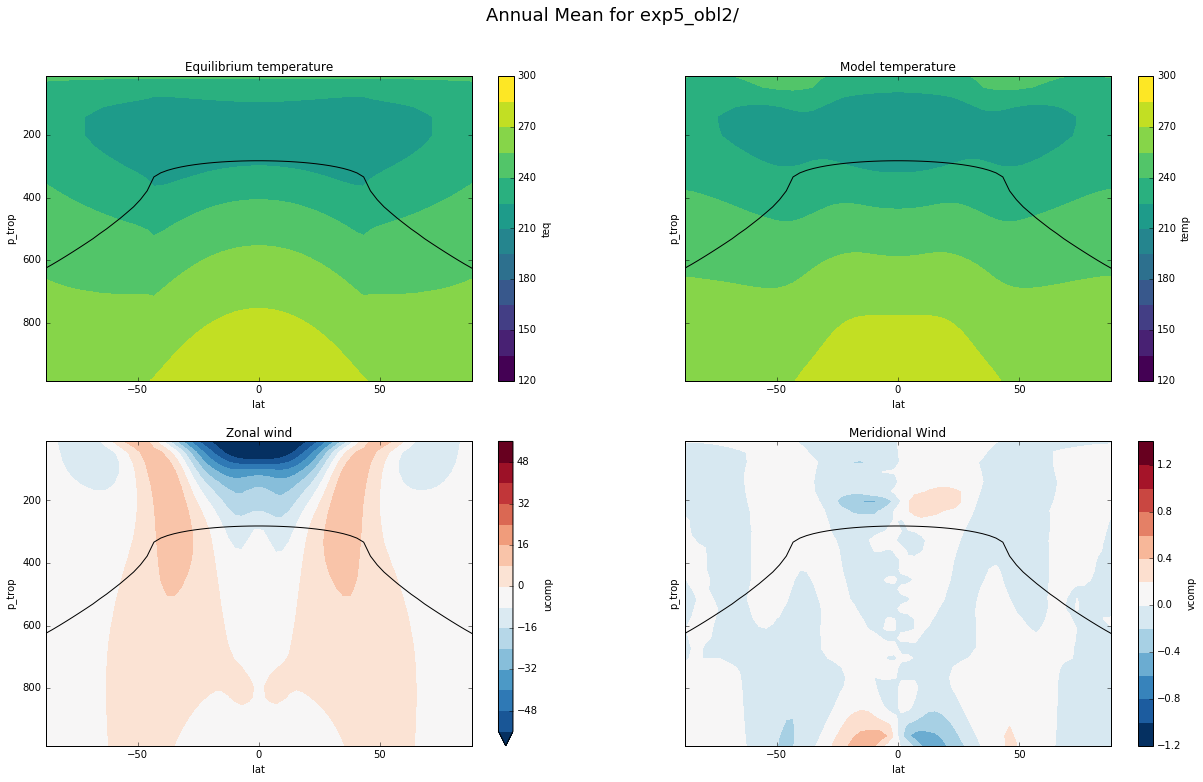

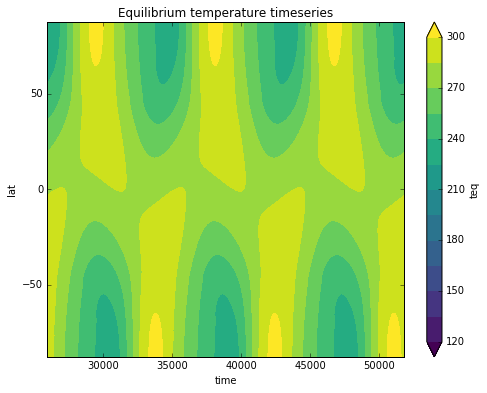

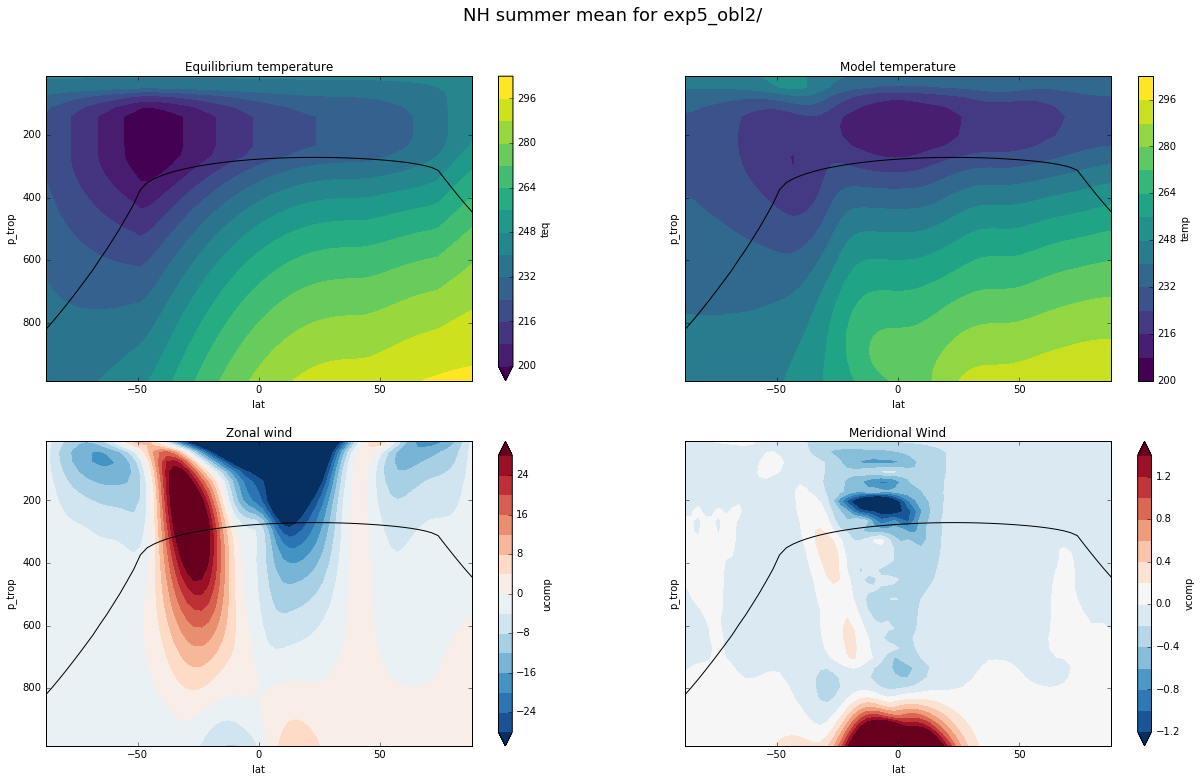

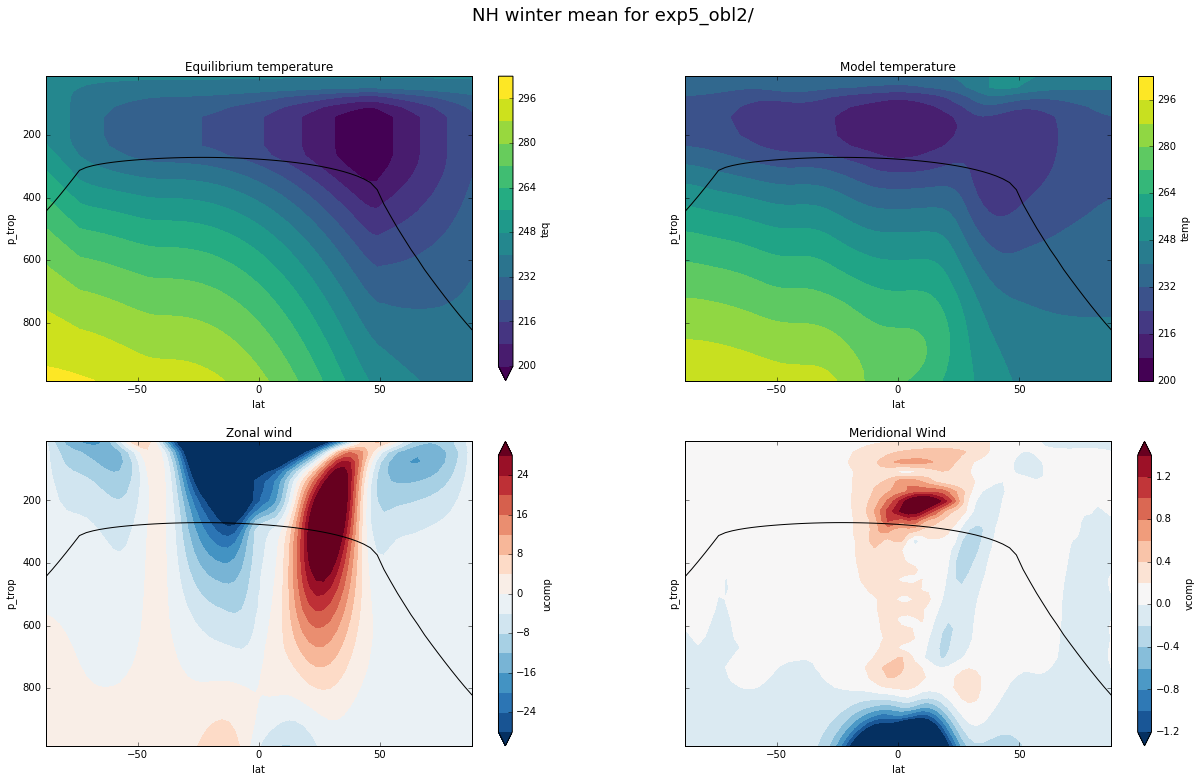

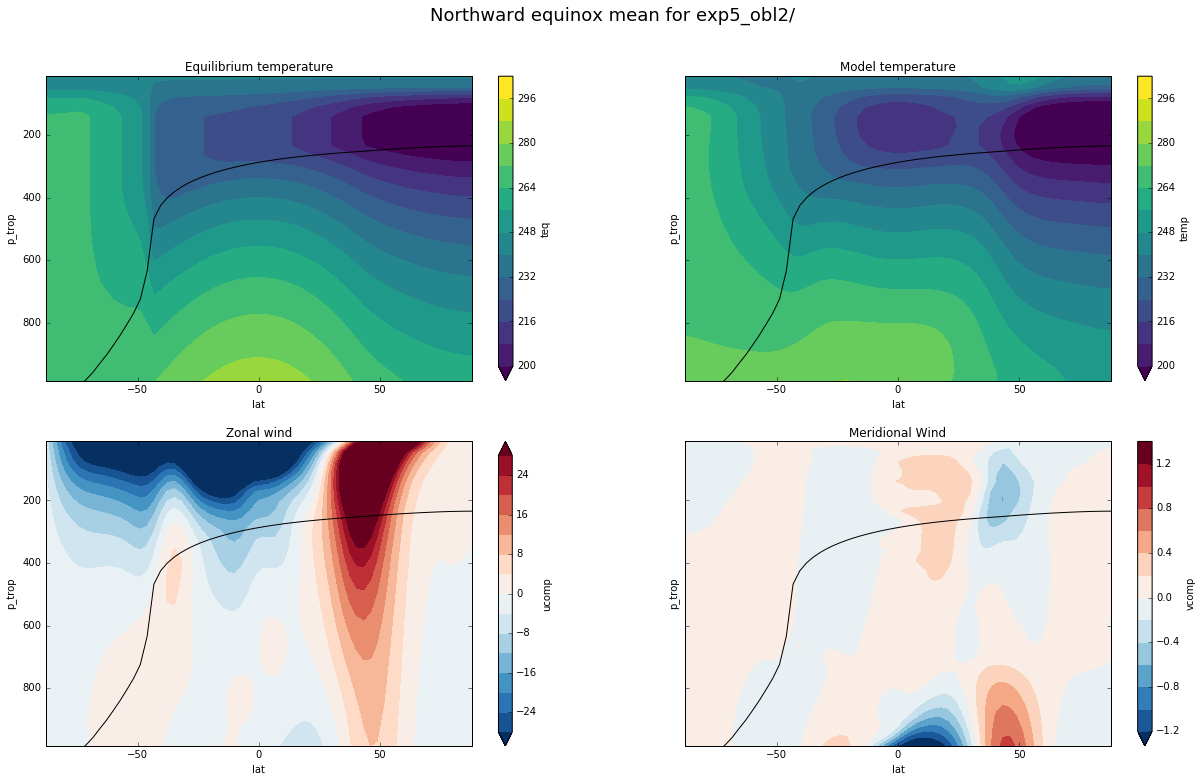

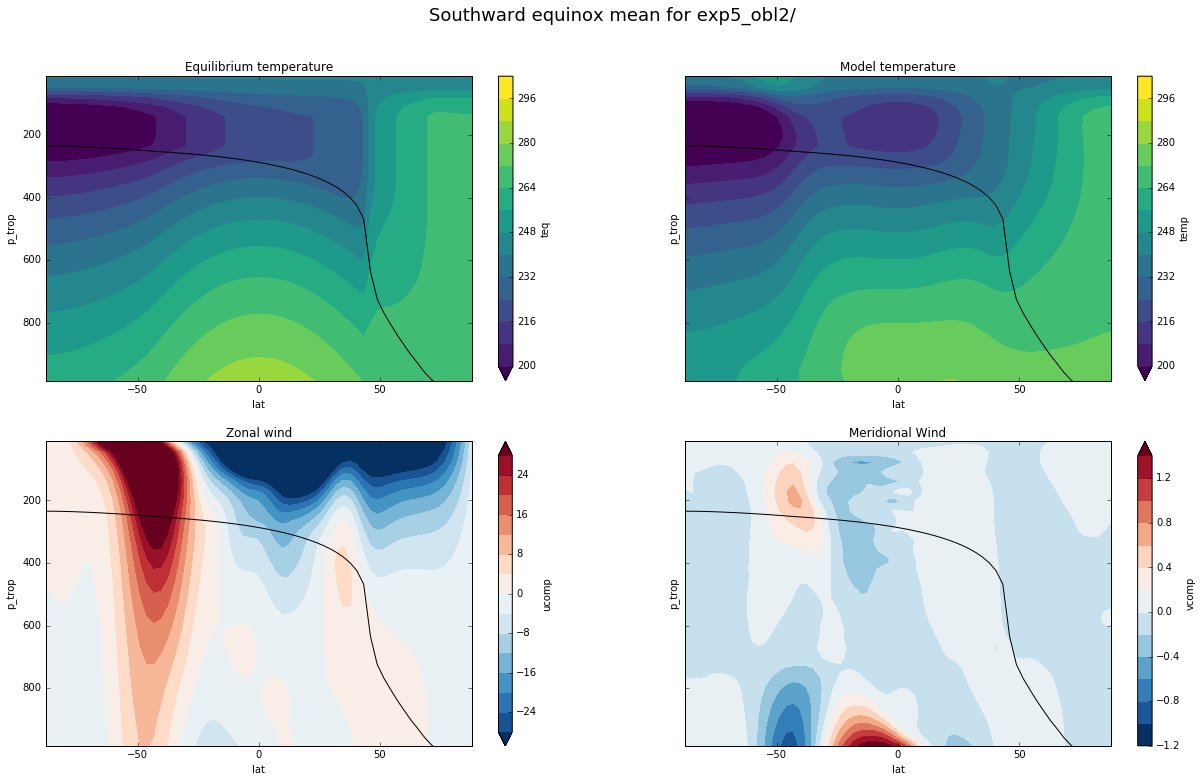

In [3]:
exp = '5_obl2/'
testfun(exp, 45)